In [425]:

import pandas as pd 
import os 
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu, normaltest
import statsmodels.stats.multitest as sm
from scipy import stats

# from utils import *


In [212]:
current_directory = os.getcwd()
print(current_directory)
# date = datetime.now().strftime("%Y%m%d")
pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

# Get current directory
current_directory = os.getcwd()
data_path = current_directory + '/Data/'

# Set path 
df = pd.read_csv(f"{data_path}/clustered/full_cd_clus_20_40_49.csv").rename(columns={'cluster': 'agglomerateto_275'})
df_loc = pd.read_csv(f"{data_path}/celldata/celldata_20240313.csv")[['cellID', 'Location_Center_X', 'Location_Center_Y']].rename(columns={'cellID': 'source_ID', 'cluster': 'agglomerateto_275'})

# Merge location data 
df_full= pd.merge(df, df_loc, on='source_ID', how='inner')


c:\Users\jhroe\Desktop\Thesis\Clean\CellularCommunityAnalysisNSCLC\Sorin


In [214]:
df_pi = pi[['Survival or loss to follow-up (years)', 'Key']]

In [3]:
treg_clusters_40 = [28, 26, 27, 37, 5, 24, 34, 22, 39, 12]
data = df_full[['Patient_ID', 'agglomerateto_40', 'surv_5y']]
data

,Patient_ID,agglomerateto_40,surv_5y
0,LUAD_D001,27,1
1,LUAD_D001,27,1
2,LUAD_D001,27,1
3,LUAD_D001,27,1
4,LUAD_D001,27,1
...,...,...,...
1637717,LUAD_D213,19,1
1637718,LUAD_D213,19,1
1637719,LUAD_D213,19,1
1637720,LUAD_D213,19,1


In [397]:
df

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,T.other,Tc,Th,Treg,Unknown,agglomerateto_275,agglomerateto_20,agglomerateto_40,agglomerateto_49,surv_5y
0,LUAD_D001,D001_0,Cancer,0.166667,0.000000,0.166667,0.166667,0.000000,0.0,0.000000,...,0.000000,0.166667,0.333333,0.0,0.000000,1,7,27,27,1
1,LUAD_D001,D001_1000,Treg,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,...,0.083333,0.083333,0.250000,0.0,0.333333,1,7,27,27,1
2,LUAD_D001,D001_1010,Unknown,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,...,0.000000,0.333333,0.000000,0.0,0.166667,1,7,27,27,1
3,LUAD_D001,D001_1011,Unknown,0.000000,0.000000,0.000000,0.181818,0.090909,0.0,0.000000,...,0.000000,0.363636,0.181818,0.0,0.181818,1,7,27,27,1
4,LUAD_D001,D001_1013,Unknown,0.142857,0.000000,0.000000,0.000000,0.142857,0.0,0.071429,...,0.071429,0.071429,0.214286,0.0,0.285714,1,7,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D213,D213_1771,Cancer,0.000000,0.076923,0.923077,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637718,LUAD_D213,D213_2703,Cancer,0.000000,0.090909,0.909091,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637719,LUAD_D213,D213_4040,Cancer,0.000000,0.100000,0.900000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637720,LUAD_D213,D213_4896,Cancer,0.000000,0.066667,0.933333,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1


In [218]:
count_data = data.groupby(['Patient_ID', 'agglomerateto_40', 'surv_5y']).size().reset_index(name='count')
total_clus = count_data.groupby(['Patient_ID', 'surv_5y'])['count'].sum().reset_index(name='total_clus')

count_data

,Patient_ID,agglomerateto_40,surv_5y,count
0,LUAD_D001,1,1,12
1,LUAD_D001,2,1,3
2,LUAD_D001,3,1,81
3,LUAD_D001,4,1,198
4,LUAD_D001,5,1,1378
...,...,...,...,...
13251,LUAD_D416,36,1,7
13252,LUAD_D416,37,1,13
13253,LUAD_D416,38,1,10
13254,LUAD_D416,39,1,177


In [219]:
count_df = pd.merge(count_data, total_clus, on=['Patient_ID','surv_5y'])
# totalscid = count_df['total_scid']
# print(count_df.head())
count_df['relative_frequency'] = (count_df['count'] / count_df['total_clus'])
count_df

,Patient_ID,agglomerateto_40,surv_5y,count,total_clus,relative_frequency
0,LUAD_D001,1,1,12,4517,0.002657
1,LUAD_D001,2,1,3,4517,0.000664
2,LUAD_D001,3,1,81,4517,0.017932
3,LUAD_D001,4,1,198,4517,0.043834
4,LUAD_D001,5,1,1378,4517,0.305070
...,...,...,...,...,...,...
13251,LUAD_D416,36,1,7,2879,0.002431
13252,LUAD_D416,37,1,13,2879,0.004515
13253,LUAD_D416,38,1,10,2879,0.003473
13254,LUAD_D416,39,1,177,2879,0.061480


In [220]:
count_df['agglomerateto_40'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 33, 34, 35, 36, 37, 38, 39,
       40, 18, 28, 10, 29, 32], dtype=int64)

In [221]:
boxplot_df = count_df.loc[count_df['agglomerateto_40'].isin(treg_clusters_40)][['Patient_ID', 'agglomerateto_40', 'surv_5y', 'relative_frequency']]
# boxplot_df
boxplot_df['agglomerateto_40'].unique()

array([ 5, 12, 22, 24, 26, 27, 34, 37, 39, 28], dtype=int64)

In [222]:
boxplot_all = count_df[['Patient_ID', 'agglomerateto_40', 'surv_5y', 'relative_frequency']]
boxplot_all


,Patient_ID,agglomerateto_40,surv_5y,relative_frequency
0,LUAD_D001,1,1,0.002657
1,LUAD_D001,2,1,0.000664
2,LUAD_D001,3,1,0.017932
3,LUAD_D001,4,1,0.043834
4,LUAD_D001,5,1,0.305070
...,...,...,...,...
13251,LUAD_D416,36,1,0.002431
13252,LUAD_D416,37,1,0.004515
13253,LUAD_D416,38,1,0.003473
13254,LUAD_D416,39,1,0.061480


In [39]:
df5 = boxplot_df.loc[boxplot_df['agglomerateto_40'] == 5]
low = df5.loc[df5['surv_5y'] == 0]
high = df5.loc[df5['surv_5y'] == 1]
high


,Patient_ID,agglomerateto_40,surv_5y,relative_frequency
4,LUAD_D001,5,1,0.305070
39,LUAD_D002,5,1,0.323614
138,LUAD_D005,5,1,0.061395
176,LUAD_D006,5,1,0.066818
214,LUAD_D007,5,1,0.078153
...,...,...,...,...
13054,LUAD_D411,5,1,0.110998
13088,LUAD_D412,5,1,0.177797
13121,LUAD_D413,5,1,0.338839
13153,LUAD_D414,5,1,0.281244


In [398]:
pvals_toptreg = []
for clus in sorted(treg_clusters_40):
    df5 = boxplot_df.loc[boxplot_df['agglomerateto_40'] == clus]
    low = df5.loc[df5['surv_5y'] == 0]
    high = df5.loc[df5['surv_5y'] == 1]
    pval = mannwhitneyu(high['relative_frequency'], low['relative_frequency'], alternative="two-sided").pvalue
    pvals_toptreg.append(pval)


# Perform Benjamini-Hochberg adjustment
pvals_toptreg_adjusted = sm.multipletests(pvals_toptreg, method='fdr_bh')[1]

# Print the adjusted p-values
print("Original p-values:", pvals_toptreg)
print("Adjusted p-values:", pvals_toptreg_adjusted)

pvals_toptreg_adjusted

Original p-values: [0.005627571933166144, 0.10034245389677324, 0.5438154508932126, 0.409458389755061, 0.04612308823323189, 0.14931285331388056, 0.659566278142925, 0.0194210653007504, 0.7533348224224216, 0.3802461796982949]
Adjusted p-values: [0.05627572 0.25085613 0.67976931 0.58494056 0.15374363 0.29862571
 0.73285142 0.09710533 0.75333482 0.58494056]


array([0.05627572, 0.25085613, 0.67976931, 0.58494056, 0.15374363,
       0.29862571, 0.73285142, 0.09710533, 0.75333482, 0.58494056])

c:\Users\jhroe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


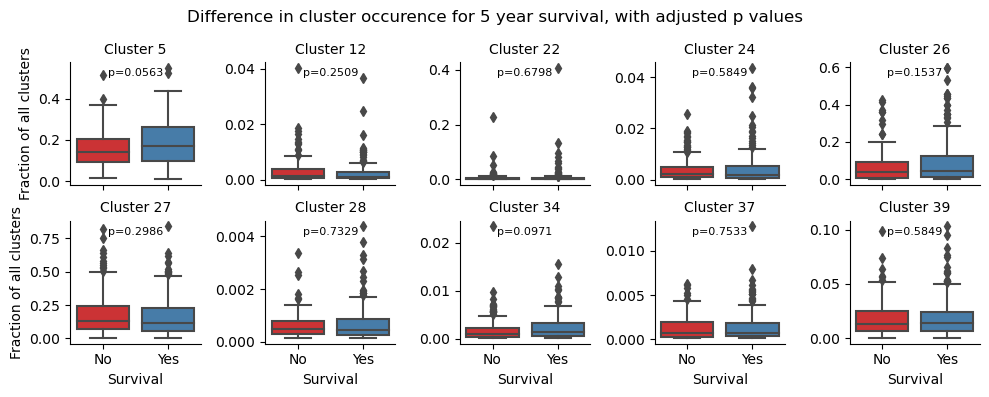

In [400]:
# Plot using Seaborn
# sns.set(style="whitegrid")
g = sns.FacetGrid(boxplot_df, col="agglomerateto_40", col_wrap=5, height=2, sharey=False)
g.map_dataframe(sns.boxplot, x="surv_5y", y="relative_frequency", palette="Set1")
g.set_axis_labels("Survival", "Fraction of all clusters")
g.set_titles("Cluster {col_name}")

# Add p-value annotation to each subplot
i = 0
for ax, (_, data) in zip(g.axes.flat, df.groupby('agglomerateto_40')):
    p_value = pvals_toptreg_adjusted[i]
    i+=1
    if p_value < 0.001:
        ax.text(0.5, 1.02, '***', ha='center', va='top', transform=ax.transAxes, fontsize= 12)
    elif p_value < 0.01:
        ax.text(0.5, 1.02, '**', ha='center', va='top', transform=ax.transAxes, fontsize= 12)
    elif p_value < 0.05:
        ax.text(0.5, 1.02, '*', ha='center', va='top', transform=ax.transAxes, fontsize= 12)

    ax.text(0.5, 0.95, f'p={p_value:.4f}', ha='center', va='top', transform=ax.transAxes, fontsize= 8)

g.set_xticklabels(["No", "Yes"])

g.fig.suptitle('Difference in cluster occurence for 5 year survival, with adjusted p values')
plt.subplots_adjust(top=0.85)  # Adjust the top to make room for the title

plt.savefig(f'{data_path}plots/boxplot_toptregclus_clus40__adjusted_pvals.png', bbox_inches='tight', dpi=300)

plt.show()


In [401]:
pvals_all = []
for clus in range(1,41):
    df5 = boxplot_all.loc[boxplot_all['agglomerateto_40'] == clus]
    low = df5.loc[df5['surv_5y'] == 0]
    high = df5.loc[df5['surv_5y'] == 1]
    pval = mannwhitneyu(high['relative_frequency'], low['relative_frequency'], alternative="two-sided").pvalue
    pvals_all.append(pval)

# Perform Benjamini-Hochberg adjustment
pvals_all_adjusted= sm.multipletests(pvals_all, method='fdr_bh')[1]

# Print the adjusted p-values
print("Original p-values:", pvals_all)
print("Adjusted p-values:", pvals_all_adjusted)

pvals_all_adjusted

Original p-values: [0.6525972085284517, 0.48141125908382665, 0.17202473049420086, 0.6164694627482954, 0.005627571933166144, 0.7437045040398584, 0.4188314391236364, 0.026703604053445254, 0.9527693731991128, 0.8719255911467134, 0.1642707330956883, 0.10034245389677324, 0.5667016022542559, 0.8767610877597112, 0.1676415763115321, 0.6188561303705006, 0.9768760795133372, 0.09754283651370656, 0.6952601723281717, 0.02175115198766208, 0.45557527859007707, 0.5438154508932126, 0.35008293994795614, 0.409458389755061, 0.23743025362915138, 0.04612308823323189, 0.14931285331388056, 0.659566278142925, 0.3824435173497025, 0.9082436530012106, 0.022558190999255285, 0.4078067031705427, 0.052625600876720205, 0.0194210653007504, 0.3308623014159665, 0.1587991342396008, 0.7533348224224216, 0.8629976422741301, 0.3802461796982949, 0.4866045444807817]
Adjusted p-values: [0.85105326 0.77856727 0.49149923 0.85105326 0.21362883 0.88627626
 0.76151171 0.21362883 0.97687608 0.94784982 0.49149923 0.44596646
 0.83955793

array([0.85105326, 0.77856727, 0.49149923, 0.85105326, 0.21362883,
       0.88627626, 0.76151171, 0.21362883, 0.97687608, 0.94784982,
       0.49149923, 0.44596646, 0.83955793, 0.94784982, 0.49149923,
       0.85105326, 0.97687608, 0.44596646, 0.86907522, 0.21362883,
       0.77856727, 0.83663916, 0.76151171, 0.76151171, 0.63314734,
       0.30071772, 0.49149923, 0.85105326, 0.76151171, 0.95604595,
       0.21362883, 0.76151171, 0.30071772, 0.21362883, 0.76151171,
       0.49149923, 0.88627626, 0.94784982, 0.76151171, 0.77856727])

c:\Users\jhroe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


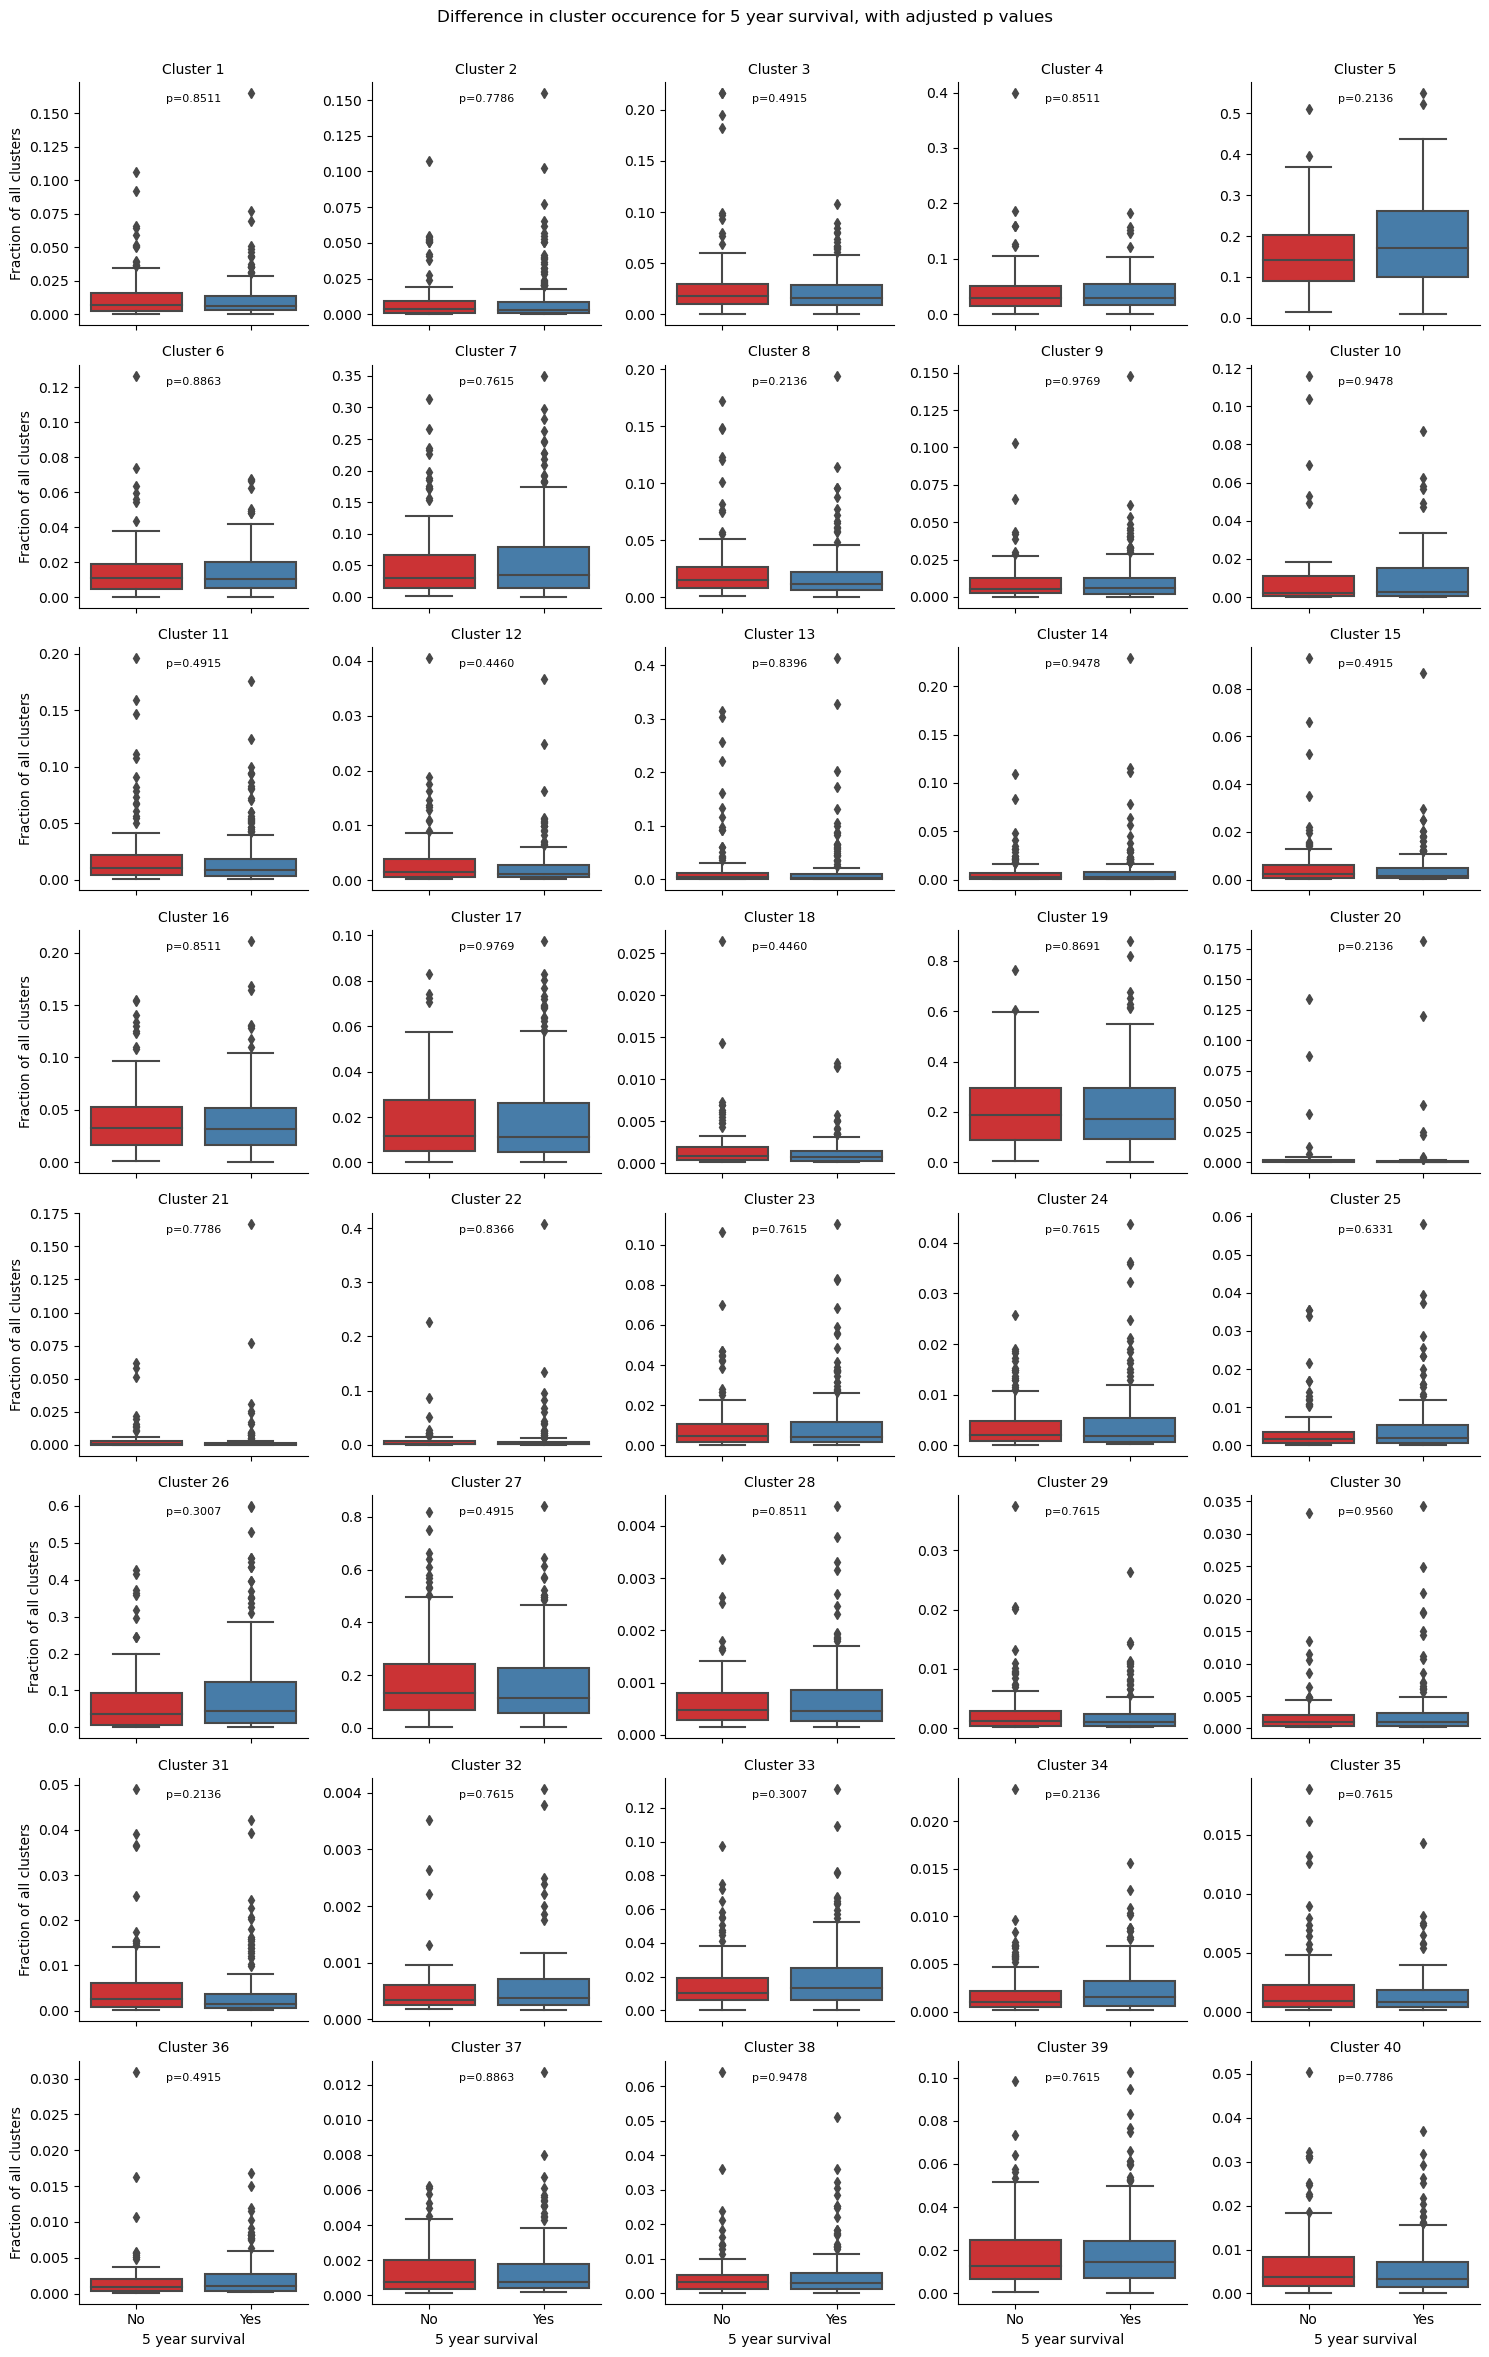

In [403]:
# Plot using Seaborn
# sns.set(style="whitegrid")
g = sns.FacetGrid(boxplot_all, col="agglomerateto_40", col_wrap=5, height=3, sharey=False)
g.map_dataframe(sns.boxplot, x="surv_5y", y="relative_frequency", palette="Set1")
g.set_axis_labels("5 year survival", "Fraction of all clusters")
g.set_titles("Cluster {col_name}")

# Add p-value annotation to each subplot
i = 0
for ax, (_, data) in zip(g.axes.flat, df.groupby('agglomerateto_40')):
    p_value = pvals_all_adjusted[i]
    i+=1
    if p_value < 0.001:
        ax.text(0.5, 1.02, '***', ha='center', va='top', transform=ax.transAxes, fontsize= 15)
    elif p_value < 0.01:
        ax.text(0.5, 1.02, '**', ha='center', va='top', transform=ax.transAxes, fontsize= 15)
    elif p_value < 0.05:
        ax.text(0.5, 1.02, '*', ha='center', va='top', transform=ax.transAxes, fontsize= 15)

    ax.text(0.5, 0.95, f'p={p_value:.4f}', ha='center', va='top', transform=ax.transAxes, fontsize= 8)

g.set_xticklabels(["No", "Yes"])

g.fig.suptitle('Difference in cluster occurence for 5 year survival, with adjusted p values')
plt.subplots_adjust(top=0.95)  # Adjust the top to make room for the title

# plt.title('Difference in cluster occurence for long')
plt.savefig(f'{data_path}plots/boxplot_allclus_clus40__adjusted_pvals.png', bbox_inches='tight', dpi=300)

plt.show()


In [231]:
boxplot_all
df_pi.rename(columns={'Key':'Patient_ID', 'Survival or loss to follow-up (years)':'survival'}, inplace=True)

surv_clus_corr = pd.merge(boxplot_all, df_pi, on='Patient_ID', how='inner').drop(columns=['surv_5y'])
surv_clus_corr[surv_clus_corr['agglomerateto_40']==1]

C:\Users\jhroe\AppData\Local\Temp\ipykernel_13772\3243373939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pi.rename(columns={'Key':'Patient_ID', 'Survival or loss to follow-up (years)':'survival'}, inplace=True)


,Patient_ID,agglomerateto_40,relative_frequency,survival
0,LUAD_D001,1,0.002657,8.386
35,LUAD_D002,1,0.019865,10.111
66,LUAD_D003,1,0.017975,2.094
104,LUAD_D004,1,0.002832,1.755
134,LUAD_D005,1,0.011860,7.598
...,...,...,...,...
13084,LUAD_D412,1,0.007740,9.944
13117,LUAD_D413,1,0.008705,8.132
13149,LUAD_D414,1,0.001079,8.550
13184,LUAD_D415,1,0.023000,1.862


In [290]:
df[df['source_cluster']=='B cell']

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,T.other,Tc,Th,Treg,Unknown,agglomerateto_275,agglomerateto_20,agglomerateto_40,agglomerateto_49,surv_5y
11,LUAD_D001,D001_1028,B cell,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.250000,...,0.083333,0.416667,0.083333,0.0000,0.083333,1,7,27,27,1
99,LUAD_D001,D001_1615,B cell,0.142857,0.000000,0.000000,0.000,0.142857,0.0,0.000000,...,0.000000,0.214286,0.214286,0.0000,0.285714,1,7,27,27,1
140,LUAD_D001,D001_1755,B cell,0.000000,0.000000,0.000000,0.125,0.125000,0.0,0.062500,...,0.000000,0.187500,0.250000,0.0625,0.125000,1,7,27,27,1
183,LUAD_D001,D001_1846,B cell,0.000000,0.000000,0.000000,0.200,0.100000,0.0,0.000000,...,0.000000,0.300000,0.200000,0.0000,0.100000,1,7,27,27,1
376,LUAD_D001,D001_2464,B cell,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.272727,...,0.000000,0.363636,0.000000,0.0000,0.272727,1,7,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632730,LUAD_D416,D416_564,B cell,0.000000,0.818182,0.000000,0.000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.181818,0.0000,0.000000,238,20,10,21,1
1632811,LUAD_D213,D213_705,B cell,0.000000,0.000000,0.600000,0.100,0.000000,0.0,0.100000,...,0.000000,0.100000,0.000000,0.1000,0.000000,3,10,5,47,1
1637146,LUAD_D213,D213_1665,B cell,0.100000,0.000000,0.700000,0.200,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,74,3,40,40,1
1637715,LUAD_D213,D213_105,B cell,0.000000,0.076923,0.923077,0.000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,274,9,19,19,1


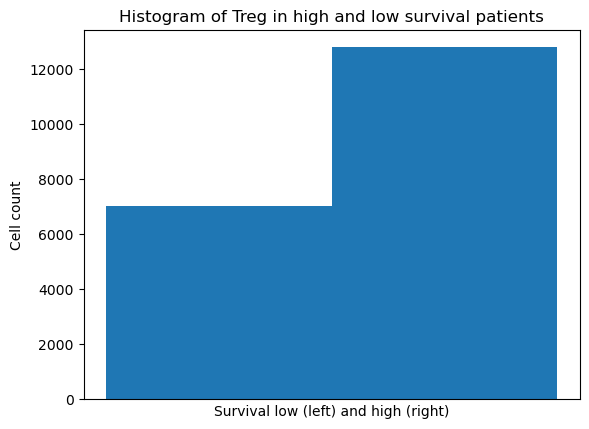

In [314]:
# Quick and dirty way to visualize distribution cellstypes across survival
ct = 'Treg'
plt.hist(df[df['source_cluster']== ct]['surv_5y'], bins=2, rwidth=1)
plt.xlabel('Survival low (left) and high (right)')
plt.xticks([])
plt.ylabel('Cell count')
plt.title(f'Histogram of {ct} in high and low survival patients')
plt.show()

In [386]:
merged_df['surv_5y'].sum()

264

C:\Users\jhroe\AppData\Local\Temp\ipykernel_13772\2986352853.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [20]
C:\Users\jhroe\AppData\Local\Temp\ipykernel_13772\2986352853.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


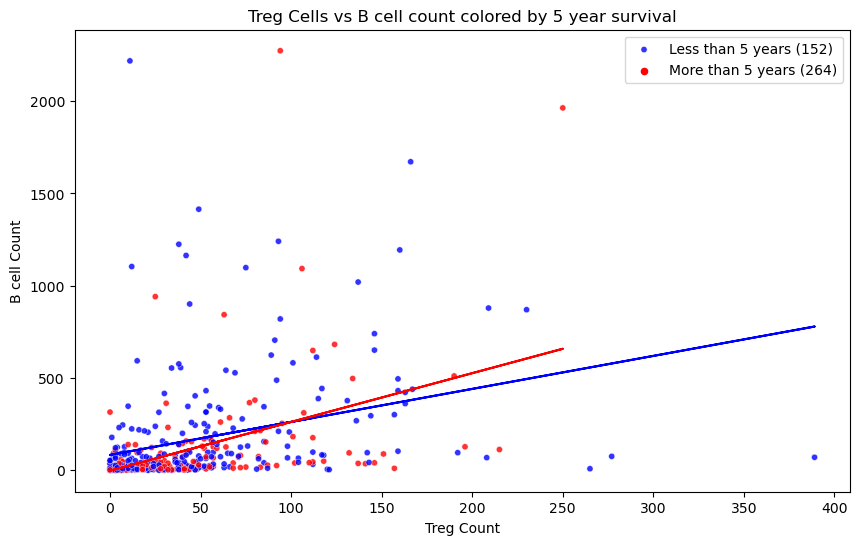

In [393]:
ct1 = 'Treg'
ct2 = 'B cell'
# Filter the DataFrame for Treg and B cells
treg_df = df[df['source_cluster'] == ct1]
b_cells_df = df[df['source_cluster'] == ct2]

# Calculate counts of Treg cells and B cells per patient
count_df = df.groupby(['Patient_ID', 'source_cluster']).size().unstack(fill_value=0).reset_index()

# Merge counts with survival information
merged_df = pd.merge(count_df, df[['Patient_ID', 'surv_5y']], on='Patient_ID').drop_duplicates()
total_surv = merged_df['surv_5y'].sum()
# merged_df
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ct1, y=ct2, hue='surv_5y', data=merged_df, palette={0: 'red', 1: 'blue'},s=20,alpha=0.8)
x = merged_df[merged_df['surv_5y'] == 1][ct1]
y = merged_df[merged_df['surv_5y'] == 1][ct2]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue')
x = merged_df[merged_df['surv_5y'] == 0][ct1]
y = merged_df[merged_df['surv_5y'] == 0][ct2]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')


plt.title(f'{ct1} Cells vs {ct2} count colored by 5 year survival')
plt.xlabel(f'{ct1} Count')
plt.ylabel(f'{ct2} Count')
legend = plt.legend(loc='upper right', labels=[f'Less than 5 years ({416-total_surv})', f'More than 5 years ({total_surv})'], )
legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [365]:
ct1 = 'Treg'
ct2 = 'B cell'
# Create a MultiIndex with all possible combinations
idx = pd.MultiIndex.from_product([df['Patient_ID'].unique(), df['source_cluster'].unique()], names=['Patient_ID', 'source_cluster'])

# Group by and count occurrences
cts_surv = df.groupby(by=['Patient_ID', 'source_cluster', 'surv_5y']).size().reindex(idx, fill_value=0).reset_index(name='count')
# cts_surv = df.groupby(by=['Patient_ID', 'source_cluster', 'surv_5y']).size().unstack(fill_value=0).stack().reset_index(name='count')
# btreg = cts_surv[cts_surv['source_cluster'].isin(['B cell', 'Treg'])]
plt.scatter(cts_surv[cts_surv['source_cluster'] == ct1]['count'], cts_surv[cts_surv['source_cluster'] == ct2]['count'],c='surv_5y', s=1)
plt.xlabel(f'Count of {ct1}')
plt.xlabel(f'Count of {ct2}')

plt.show()
# count_data = data.groupby(['Patient_ID', 'agglomerateto_40', 'surv_5y']).size()


ValueError: operands could not be broadcast together with shapes (7072,2) (3,) (7072,2) 

In [315]:
df[df['source_cluster']== ct]['surv_5y']

,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,T.other,Tc,Th,Treg,Unknown,agglomerateto_275,agglomerateto_20,agglomerateto_40,agglomerateto_49,surv_5y
0,LUAD_D001,D001_0,Cancer,0.166667,0.000000,0.166667,0.166667,0.000000,0.0,0.000000,...,0.000000,0.166667,0.333333,0.0,0.000000,1,7,27,27,1
1,LUAD_D001,D001_1000,Treg,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,...,0.083333,0.083333,0.250000,0.0,0.333333,1,7,27,27,1
2,LUAD_D001,D001_1010,Unknown,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,...,0.000000,0.333333,0.000000,0.0,0.166667,1,7,27,27,1
3,LUAD_D001,D001_1011,Unknown,0.000000,0.000000,0.000000,0.181818,0.090909,0.0,0.000000,...,0.000000,0.363636,0.181818,0.0,0.181818,1,7,27,27,1
4,LUAD_D001,D001_1013,Unknown,0.142857,0.000000,0.000000,0.000000,0.142857,0.0,0.071429,...,0.071429,0.071429,0.214286,0.0,0.285714,1,7,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D213,D213_1771,Cancer,0.000000,0.076923,0.923077,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637718,LUAD_D213,D213_2703,Cancer,0.000000,0.090909,0.909091,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637719,LUAD_D213,D213_4040,Cancer,0.000000,0.100000,0.900000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1
1637720,LUAD_D213,D213_4896,Cancer,0.000000,0.066667,0.933333,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,274,9,19,19,1


In [ ]:
# Quick and dirty way to visualize distribution cellstypes across survival
ct1 = 'Treg'
ct2 ='B cell'
plt.scatter
plt.xlabel('Survival low (left) and high (right)')
plt.xticks([])
plt.ylabel('Cell count')
plt.title(f'Histogram of {ct} in high and low survival patients')
plt.show()

c:\Users\jhroe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


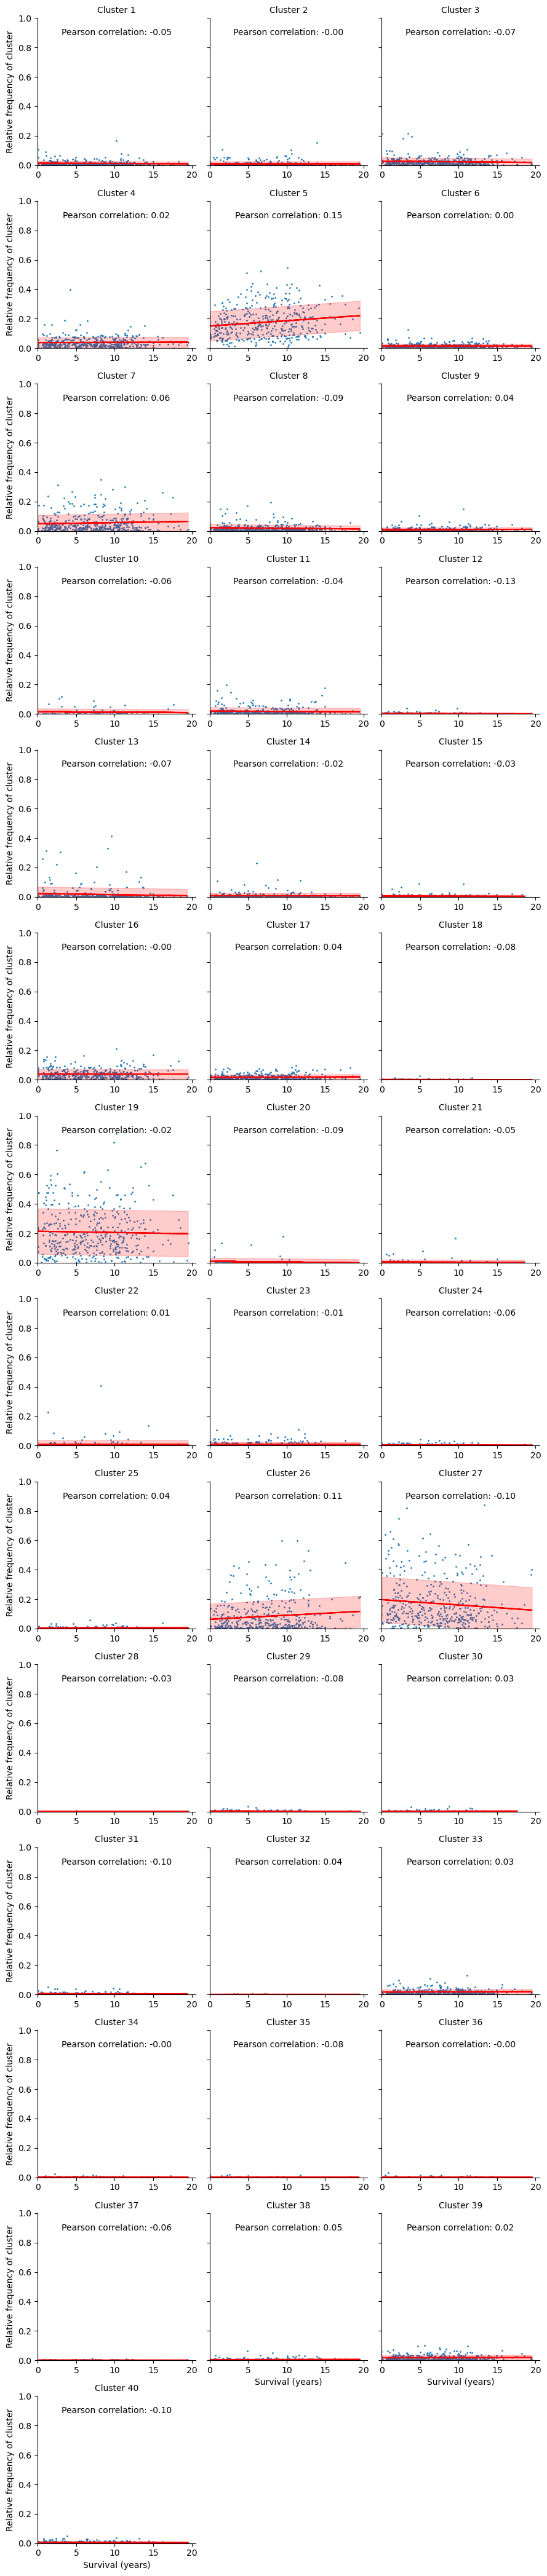

In [265]:
from scipy.stats import pearsonr


temp = pd.DataFrame()
temp['survival'] = surv_clus_corr['survival']
temp['relative_frequency'] = surv_clus_corr['relative_frequency']
temp['cluster'] = surv_clus_corr['agglomerateto_40']

# Create a FacetGrid
grid = sns.FacetGrid(temp, col='cluster', col_wrap=3, height=3)
grid.set_titles("Cluster {col_name}")
for ax in grid.axes.flatten():
    ax.tick_params(labelbottom=True)

# Define the function to plot scatter and regression line
def plot_scatter_regression(x, y, color, **kwargs):
    plt.scatter(x, y, color=color, s=1)  # Set size of scatter points to 1
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red')

    # Calculate Pearson correlation coefficient
    corr, _ = pearsonr(x, y)

    plt.ylim(0, 1)
    plt.xlim(0, None)

    # Calculate and plot standard deviation areas
    std = np.std(y - (m * x + b))
    x_fill = np.linspace(min(x), max(x), 50)
    plt.fill_between(x_fill, (m*x_fill + b) - std, (m*x_fill + b) + std, color='red', alpha=0.2)

    # Add correlation coefficient to the plot
    plt.text(0.5, 0.9, f'Pearson correlation: {corr:.2f}', ha='center', va='center', transform=plt.gca().transAxes)


# Map scatter plot and regression line to each plot in the grid
grid.map(plot_scatter_regression, 'survival', 'relative_frequency')

# Set the x-axis labels for each subplot
grid.set_axis_labels('Survival (years)', 'Relative frequency of cluster')

# # Set x-axis labels for each subplot
# for ax, cluster_num in zip(grid.axes.flat, range(1, 41)):
#     ax.set_xlabel(f'Cluster {cluster_num}')
#     ax.set_xticks(np.arange(0, max(temp['survival']) + 1, 5))  # Adjust as needed

    
plt.show()

In [259]:




# for clus in range(1,41):
#     temp = surv_clus_corr[surv_clus_corr['agglomerateto_40'] == clus]
#     x = temp['survival']
#     y = temp['relative_frequency']

#     # Calculate Pearson correlation coefficient
#     corr, _ = pearsonr(x, y)

#     # Fit a linear regression line
#     m, b = np.polyfit(x, y, 1)

#     # Scatter plot
#     plt.scatter(x, y, s=1)
#     plt.ylim(0, 1)
#     plt.xlim(0, None)


#     # Plot the regression line
#     plt.plot(x, m*x + b, color='red')

#     # Calculate and plot standard deviation areas
#     std = np.std(y - (m * x + b))
#     x_fill = np.linspace(min(x), max(x), 50)
#     plt.fill_between(x_fill, (m*x_fill + b) - std, (m*x_fill + b) + std, color='gray', alpha=0.2)

#     # Add correlation coefficient to the plot
#     plt.text(0.5, 0.9, f'Pearson correlation: {corr:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

#     plt.title(f"Cluster {clus}")
#     plt.xlabel('Survival (years)')
#     plt.ylabel('Relative frequency of cluster')
#     plt.show()
# # plt.sho

In [445]:
surv_clus_corr

,Patient_ID,agglomerateto_40,relative_frequency,survival
0,LUAD_D001,1,0.002657,8.386
1,LUAD_D001,2,0.000664,8.386
2,LUAD_D001,3,0.017932,8.386
3,LUAD_D001,4,0.043834,8.386
4,LUAD_D001,5,0.305070,8.386
...,...,...,...,...
13251,LUAD_D416,36,0.002431,9.386
13252,LUAD_D416,37,0.004515,9.386
13253,LUAD_D416,38,0.003473,9.386
13254,LUAD_D416,39,0.061480,9.386


In [449]:
from lifelines import KaplanMeierFitter

# kaplan meijer plot accoring to Sorin

# Insert cluster for which kaplan meijer needs to be divided

vip_cluster = 1
# df_km = df.drop(columns='source_ID')

patients_km = surv_clus_corr[['Patient_ID', 'agglomerateto_40', 'survival']].groupby(['Patient_ID', 'survival', 'agglomerateto_40']).size().unstack(fill_value=0).reset_index()
patients_km.set_index(['Patient_ID', 'survival'], inplace=True)



# patients_km.set_index('Patient_ID')
# Calculate the row totals
row_totals = patients_km.sum(axis=1)

# # Divide every row by its row total
normalized_km = patients_km.div(row_totals, axis=0)
normalized_km
# patients_km
# row_totals

# Assuming your dataframe is named df
# Calculate the z-score for the 'agglomerateto40' column
normalized_km['zscore'] = stats.zscore(normalized_km[[vip_cluster]])

# Filter the dataframe for patients with a z-score of 0 or higher
patients_with_neg_zscore = normalized_km[normalized_km['zscore'] < 0]
patients_with_pos_zscore = normalized_km[normalized_km['zscore'] >= 0]

patients_with_pos_zscore
# normalized_km
# Display the resulting dataframe
# print(patients_with_positive_zscore)

,agglomerateto_40,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Patient_ID,survival,,,,,,,,,,,,,,,,,,,,,
LUAD_D001,8.386,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.000000,...,0.028571,0.000000,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571
LUAD_D002,10.111,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.000000,...,0.000000,0.000000,0.032258,0.032258,0.032258,0.000000,0.000000,0.032258,0.032258,0.032258
LUAD_D003,2.094,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,...,0.026316,0.000000,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316
LUAD_D004,1.755,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.000000,...,0.033333,0.000000,0.033333,0.033333,0.033333,0.000000,0.033333,0.033333,0.033333,0.033333
LUAD_D005,7.598,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,...,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUAD_D412,9.944,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.000000,...,0.000000,0.000000,0.030303,0.030303,0.030303,0.000000,0.030303,0.030303,0.030303,0.030303
LUAD_D413,8.132,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.000000,...,0.031250,0.000000,0.031250,0.031250,0.031250,0.031250,0.000000,0.031250,0.031250,0.031250
LUAD_D414,8.550,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,...,0.028571,0.000000,0.028571,0.028571,0.000000,0.028571,0.028571,0.028571,0.028571,0.028571


,agglomerateto_40,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,zscore
Patient_ID,survival,,,,,,,,,,,,,,,,,,,,,
LUAD_D002,10.111,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.000000,...,0.000000,0.032258,0.032258,0.032258,0.000000,0.000000,0.032258,0.032258,0.032258,0.120191
LUAD_D004,1.755,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.000000,...,0.000000,0.033333,0.033333,0.033333,0.000000,0.033333,0.033333,0.033333,0.033333,0.275814
LUAD_D011,0.783,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.000000,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.275814
LUAD_D012,1.698,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.000000,...,0.032258,0.032258,0.032258,0.000000,0.032258,0.000000,0.032258,0.032258,0.032258,0.120191
LUAD_D013,11.516,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,...,0.000000,0.032258,0.032258,0.000000,0.000000,0.032258,0.032258,0.032258,0.032258,0.120191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUAD_D394,6.530,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.000000,...,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.037037,0.037037,0.037037,0.811847
LUAD_D397,5.761,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.000000,...,0.000000,0.032258,0.032258,0.000000,0.032258,0.000000,0.032258,0.032258,0.032258,0.120191
LUAD_D400,2.626,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.000000,...,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,0.040000,0.040000,0.040000,1.240674


In [451]:
patients_with_neg_zscore

,agglomerateto_40,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,zscore
Patient_ID,survival,,,,,,,,,,,,,,,,,,,,,
LUAD_D001,8.386,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.000000,...,0.000000,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,-0.413372
LUAD_D003,2.094,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,...,0.000000,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,-0.739828
LUAD_D005,7.598,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,...,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,-0.739828
LUAD_D006,5.246,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,...,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,0.026316,-0.739828
LUAD_D007,9.829,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.000000,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,-0.528236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUAD_D412,9.944,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.000000,...,0.000000,0.030303,0.030303,0.030303,0.000000,0.030303,0.030303,0.030303,0.030303,-0.162759
LUAD_D413,8.132,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.000000,...,0.000000,0.031250,0.031250,0.031250,0.031250,0.000000,0.031250,0.031250,0.031250,-0.025705
LUAD_D414,8.550,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,0.028571,...,0.000000,0.028571,0.028571,0.000000,0.028571,0.028571,0.028571,0.028571,0.028571,-0.413372


In [405]:
grouped

source_cluster,Alt MAC,B cell,Cancer,Cl MAC,Cl Mo,DCs cell,Endothelial cell,Int Mo,Mast cell,NK cell,Neutrophils,Non-Cl Mo,T other,Tc,Th,Treg,Unknown
agglomerateto_40,,,,,,,,,,,,,,,,,
1,316,65,5427,6456,166,12,715,52,64,28,294,199,151,411,451,101,1630
2,110,69,332,702,200,9,894,20,92,378,126,75,86,191,305,39,7293
3,395,153,23950,2181,825,18,1298,141,839,59,338,259,944,1129,1334,198,3590
4,784,290,48771,2274,317,22,1348,198,141,81,374,354,603,3609,2439,329,1532
5,5097,15289,95472,27658,8177,234,30255,1823,2444,676,6358,3919,5664,26846,39674,4888,21633
6,371,126,13445,3505,266,19,456,118,86,40,290,258,289,1705,902,151,1154
7,554,243,59620,4163,692,25,7593,151,415,113,674,584,495,1750,2283,385,4252
8,468,114,14552,4643,990,20,710,258,106,50,341,1391,299,768,969,217,5046
9,71,48,7798,709,151,2,647,20,70,19,127,105,142,441,388,44,4098


In [266]:
# Old enrichtment heatmap


# enrichment = df_clusct.groupby(['source_cluster', 'agglomerateto_40']).size() / df.groupby('agglomerateto_40').size()
grouped = df[['source_cluster', 'agglomerateto_40']].groupby(['source_cluster', 'agglomerateto_40']).size().unstack(fill_value=0).T
fractions = grouped.div(grouped.sum(axis=1), axis=0)
# Min-Max scaling
min_max_scaled = (fractions - fractions.min()) / (fractions.max() - fractions.min())

# Normalize to range -1 to 1
normalized_df = min_max_scaled * 2 - 1
normalized_df.head()

source_cluster,Alt MAC,B cell,Cancer,Cl MAC,Cl Mo,DCs cell,Endothelial cell,Int Mo,Mast cell,NK cell,Neutrophils,Non-Cl Mo,T other,Tc,Th,Treg,Unknown
agglomerateto_40,,,,,,,,,,,,,,,,,
1,-0.927430,-0.993169,-0.299512,0.045730,-0.928847,-0.566983,-0.798058,-0.573054,-0.652671,-0.902169,-0.962337,-0.469801,-0.500907,-0.802490,-0.823949,-0.619065,-0.716516
2,-0.962911,-0.987769,-0.943421,-0.845727,-0.867295,-0.508202,-0.610105,-0.751332,-0.243916,1.000000,-0.976296,-0.700409,-0.571961,-0.867836,-0.819504,-0.785100,1.000000
3,-0.961267,-0.992867,0.366452,-0.863094,-0.840531,-0.714700,-0.840680,-0.491495,1.000000,-0.909453,-0.982023,-0.699897,0.401128,-0.756924,-0.768761,-0.674605,-0.726200
4,-0.953955,-0.991724,0.652674,-0.923501,-0.966352,-0.793135,-0.905078,-0.576380,-0.800601,-0.926253,-0.988923,-0.757988,-0.479934,-0.518361,-0.748476,-0.679511,-0.940934
5,-0.934869,-0.885289,-0.311903,-0.766105,-0.798113,-0.528400,-0.511253,-0.164030,-0.259207,-0.868084,-0.954071,-0.416130,0.064791,-0.218391,-0.102224,0.061850,-0.793419


In [276]:
from scipy import stats

z_scores = stats.zscore(fractions, axis=0)
# z_scores

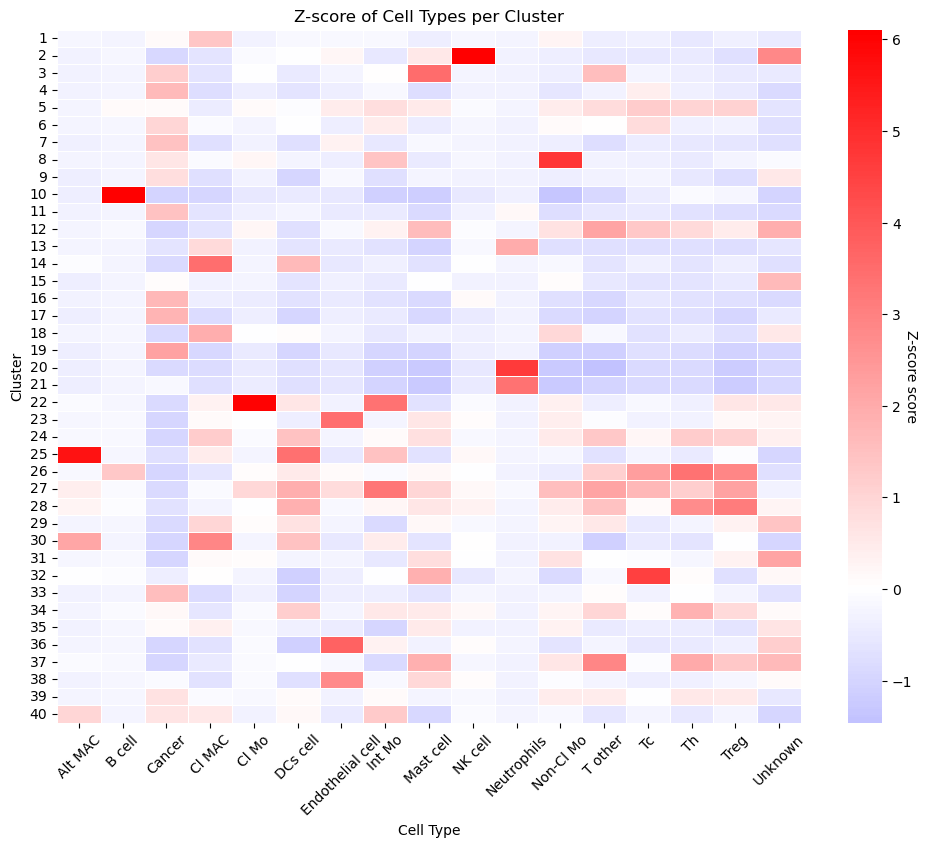

In [278]:
# enrichment = normalized_df
enrichment = z_scores
# Plot heatmap
plt.figure(figsize=(12, 9))
ax = sns.heatmap(enrichment, cmap='bwr', fmt=".2f", linewidths=.5, center=0)

plt.title('Z-score of Cell Types per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Cell Type')
plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Edit the colorbar
cbar = ax.collections[0].colorbar

cbar.set_label('Z-score score', rotation=270) 
# cbar.set_ticks([-1 ,0, 1])
plt.savefig(f"{data_path}/plots/Celltype_Cluster_zscore")
# Show the plot
plt.show()

In [154]:
# New Enrichtment Heatmap
perm_df = df[['source_cluster', 'agglomerateto_40']]

In [195]:
# Calculate enrichment per celltype in cluster 
def observed_enrichment(data):
    # Calculate observed enrichment of cell types within clusters
    observed_enrichment = data.groupby(['agglomerateto_40', 'source_cluster']).size().unstack(fill_value=0)
    observed_enrichment = observed_enrichment.div(observed_enrichment.sum(axis=1), axis=0)
    return observed_enrichment

def calculate_enrichment_score(p_values, observed_enrichment, null_enrichment):
    # Translate p-values to enrichment scores
    enrichment_scores = np.where(observed_enrichment >= null_enrichment, 1 - 2 * p_values, 2 * p_values - 1)
    return enrichment_scores

def permutation_test(data, n_permutations=1000):
    # Compute observed enrichment
    observed = observed_enrichment(data)
    
    permutation_results = np.zeros((n_permutations, observed.shape[0], observed.shape[1]))
    
    # Perform Permutation test
    for i in range(n_permutations):
        shuffled_data = data.copy()
        shuffled_data['source_cluster'] = np.random.permutation(shuffled_data['source_cluster'])
        permuted_enrichment = observed_enrichment(shuffled_data)
        permutation_results[i] = permuted_enrichment.values
    
    observed_statistic = observed.values
    
    # Calculate p-values for both tails
    p_values_upper = np.mean(permutation_results >= observed_statistic, axis=0)
    p_values_lower = np.mean(permutation_results <= observed_statistic, axis=0)
    
    # Compute the two-tailed p-values
    p_values = np.minimum(p_values_upper, p_values_lower) * 2

    # Cap the p-values at 1
    p_values = np.minimum(p_values, 1)
    
    p_values = pd.DataFrame(p_values, columns=observed.columns)


    # Calculate enrichment
    enrichment_scores = calculate_enrichment_score(p_values, observed.values, np.mean(permutation_results, axis=0))
    enrichment_scores = pd.DataFrame(enrichment_scores, columns=observed.columns)
    p_values.index = p_values.index + 1
    enrichment_scores.index = enrichment_scores.index + 1

    return p_values, enrichment_scores

# Example usage
# Assuming your DataFrame is named 'df' with columns 'cluster' and 'cell_type'
p_values, enrichment_scores = permutation_test(df)

# p_values is a DataFrame containing the two-tailed p-values for each combination of cluster and cell type


In [394]:
p_values

source_cluster,Alt MAC,B cell,Cancer,Cl MAC,Cl Mo,DCs cell,Endothelial cell,Int Mo,Mast cell,NK cell,Neutrophils,Non-Cl Mo,T other,Tc,Th,Treg,Unknown
1,0.0000,0.0000,0.0,0.0000,0.0000,0.6702,0.0000,0.0002,0.0002,0.1460,0.0000,0.0444,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0,0.0000,0.0006,1.0000,0.0000,0.0000,0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0,0.0000,0.1612,0.0072,0.0000,0.0000,0.0000,0.0032,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0,0.0038,0.0000,0.1710,0.0000,0.0000,0.0000,0.6646,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0,0.0000,0.0000,0.9592,0.0000,1.0000,0.0000,0.1038,0.0000,0.2726,0.0060,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0014,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0,0.0000,0.0000,0.2284,0.0000,0.0000,0.0000,0.0170,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0,0.0000,0.0000,0.0004,0.0000,0.0000,0.0850,0.0104,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
10,0.0000,0.0000,0.0,0.0000,0.0000,0.3868,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


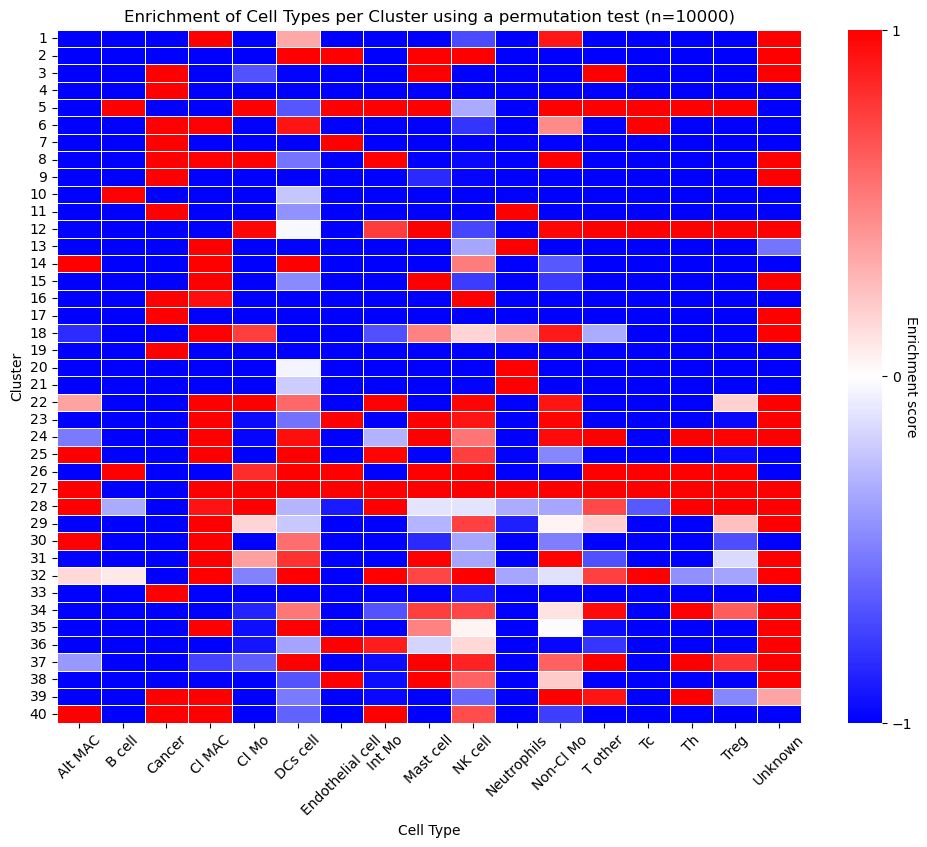

In [208]:
# Plot heatmap
plt.figure(figsize=(12, 9))
ax = sns.heatmap(enrichment_scores, cmap='bwr', fmt=".2f", linewidths=.5, center=0)

plt.title('Enrichment of Cell Types per Cluster using a permutation test (n=10000)')
plt.ylabel('Cluster')
plt.xlabel('Cell Type')
plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Edit the colorbar
cbar = ax.collections[0].colorbar

cbar.set_label('Enrichment score', rotation=270) 
cbar.set_ticks([-1 ,0, 1])
plt.savefig(f"{data_path}/plots/Celltype_Cluster_enrichment_permutation")
# Show the plot
plt.show()